In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
GROUP_SIZE_FACTOR = 15

GROUP_SIZES = [1]*4*GROUP_SIZE_FACTOR + [5]*2*GROUP_SIZE_FACTOR + [10]*2*GROUP_SIZE_FACTOR + [25]*GROUP_SIZE_FACTOR
N_GROUPS = len(GROUP_SIZES)

GROUP_MEANS = pd.Series(
    np.random.normal(loc=0.0, scale=10.0, size=N_GROUPS),
    index=np.arange(N_GROUPS)
)

WITHIN_GROUP_STD = 10.0

In [3]:
def sample_group(group_size, group_mean, group_id):
    return pd.DataFrame({
        'id': np.repeat(group_id, repeats=group_size),
        'group_mean': np.repeat(group_mean, repeats=group_size),
        'target': np.random.normal(loc=group_mean, scale=WITHIN_GROUP_STD, size=group_size)
    })

In [4]:
def sample_data(group_sizes, group_means):
    assert len(group_sizes) == len(group_means)
    dfs = []
    for id, (size, mean) in enumerate(zip(group_sizes, group_means)):
        dfs.append(sample_group(size, mean, id))
    return pd.concat(dfs).reset_index()

In [5]:
data = sample_data(GROUP_SIZES, GROUP_MEANS)

In [6]:
data.head(100)

,index,id,group_mean,target
0,0,0,-3.231922,-2.413938
1,0,1,4.616068,10.366445
2,0,2,-7.287457,-11.316006
3,0,3,2.236079,9.021663
4,0,4,18.429382,41.563730
...,...,...,...,...
95,0,67,1.378699,3.656059
96,1,67,1.378699,4.345188
97,2,67,1.378699,-6.222289
98,3,67,1.378699,-8.124627


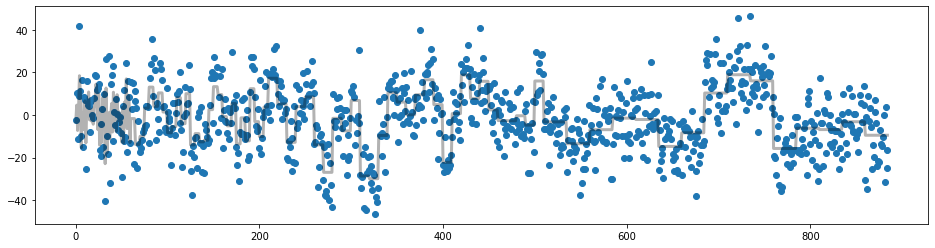

In [7]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(data.index, data['group_mean'], color='black', linewidth=3, alpha=0.3)
ax.scatter(data.index, data['target'])

In [8]:
model = smf.mixedlm("target ~ 1", data, groups=data['id'])

In [9]:
fit_model = model.fit()

In [10]:
fit_model.random_effects_cov

{0:            Group
 Group  60.107168,
 1:            Group
 Group  60.107168,
 2:            Group
 Group  60.107168,
 3:            Group
 Group  60.107168,
 4:            Group
 Group  60.107168,
 5:            Group
 Group  60.107168,
 6:            Group
 Group  60.107168,
 7:            Group
 Group  60.107168,
 8:            Group
 Group  60.107168,
 9:            Group
 Group  60.107168,
 10:            Group
 Group  60.107168,
 11:            Group
 Group  60.107168,
 12:            Group
 Group  60.107168,
 13:            Group
 Group  60.107168,
 14:            Group
 Group  60.107168,
 15:            Group
 Group  60.107168,
 16:            Group
 Group  60.107168,
 17:            Group
 Group  60.107168,
 18:            Group
 Group  60.107168,
 19:            Group
 Group  60.107168,
 20:            Group
 Group  60.107168,
 21:            Group
 Group  60.107168,
 22:            Group
 Group  60.107168,
 23:            Group
 Group  60.107168,
 24:            Group
 Gro

In [11]:
dir(fit_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_expand_re_names',
 '_get_robustcov_results',
 '_use_t',
 'aic',
 'bic',
 'bootstrap',
 'bse',
 'bse_fe',
 'bse_re',
 'bsejac',
 'bsejhj',
 'conf_int',
 'converged',
 'cov_params',
 'cov_pen',
 'cov_re',
 'cov_re_unscaled',
 'covjac',
 'covjhj',
 'df_modelwc',
 'df_resid',
 'f_test',
 'fe_params',
 'fittedvalues',
 'freepat',
 'get_nlfun',
 'hessv',
 'hist',
 'initialize',
 'k_constant',
 'k_fe',
 'k_re',
 'k_re2',
 'k_vc',
 'llf',
 'load',
 'method',
 'model',
 'nobs',
 'normalized_cov_params',
 'params',
 'params_object',
 'predict',
 'profile_re',
 'pvalues',
 'random_effects',
 'random_effec

In [12]:
fit_random_effects = []
for idx, group_size in enumerate(GROUP_SIZES):
    fit_random_effects.extend(
        [fit_model.fe_params[0] + fit_model.random_effects[idx][0]] * group_size
    )

In [13]:
data

,index,id,group_mean,target
0,0,0,-3.231922,-2.413938
1,0,1,4.616068,10.366445
2,0,2,-7.287457,-11.316006
3,0,3,2.236079,9.021663
4,0,4,18.429382,41.563730
...,...,...,...,...
880,20,134,-9.527239,-0.036256
881,21,134,-9.527239,-31.687852
882,22,134,-9.527239,3.791239
883,23,134,-9.527239,-16.296713


In [14]:
fit_model.fe_params

Intercept   -0.310444
dtype: float64

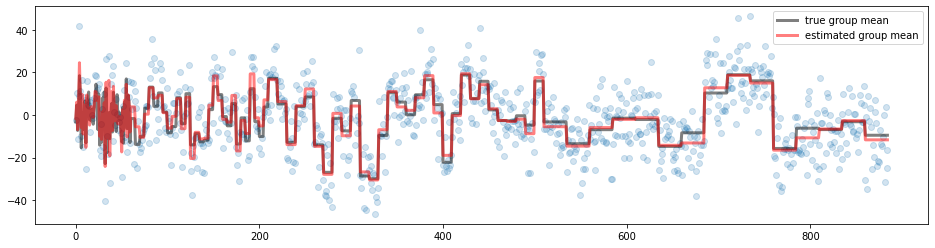

In [15]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(data.index, data['group_mean'], color='black', linewidth=3, alpha=0.5, label='true group mean')
ax.plot(data.index, fit_random_effects, color='red', linewidth=3, alpha=0.5, label='estimated group mean')

ax.scatter(data.index, data['target'], alpha=0.2)

ax.legend()

In [16]:
emperical_group_means = data.groupby('id').mean()['target']
estimated_group_means = [fit_model.fe_params[0] + fit_model.random_effects[idx][0] for idx in range(N_GROUPS)]
actual_group_means = GROUP_MEANS

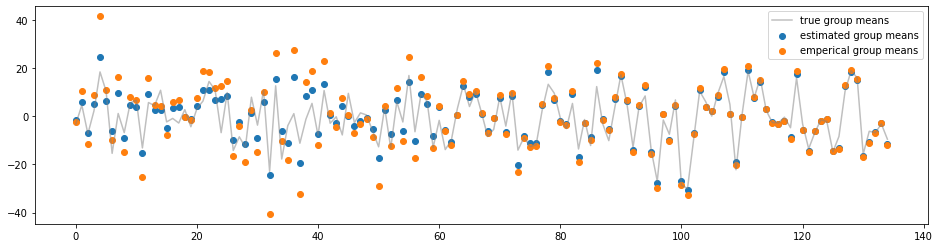

In [17]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(np.arange(N_GROUPS), actual_group_means, label='true group means', color='grey', alpha=0.5)
ax.scatter(np.arange(N_GROUPS), estimated_group_means, label='estimated group means')
ax.scatter(np.arange(N_GROUPS), emperical_group_means, label='emperical group means')

ax.legend()

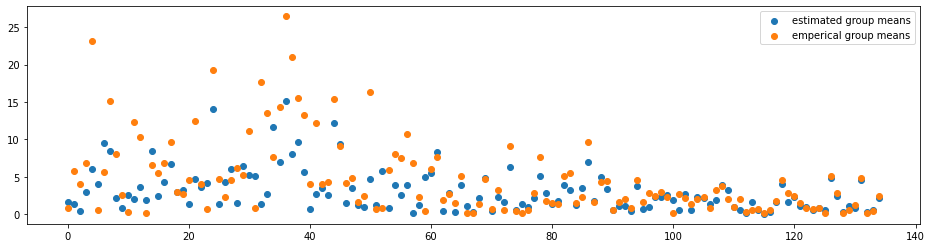

In [18]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.scatter(np.arange(N_GROUPS), np.abs(estimated_group_means - actual_group_means), label='estimated group means')
ax.scatter(np.arange(N_GROUPS), np.abs(emperical_group_means - actual_group_means), label='emperical group means')

ax.legend()

(array([0.23893472, 0.13352234, 0.15460482, 0.05621993, 0.09135739,
        0.04919244, 0.02810997, 0.04216495, 0.01405498, 0.02108247,
        0.01405498, 0.02108247, 0.01405498, 0.00702749, 0.02108247,
        0.00702749, 0.00702749, 0.        , 0.00702749, 0.00702749,
        0.        , 0.00702749, 0.        , 0.        , 0.00702749]),
 array([ 0.11048932,  1.16455069,  2.21861205,  3.27267341,  4.32673478,
         5.38079614,  6.4348575 ,  7.48891887,  8.54298023,  9.59704159,
        10.65110296, 11.70516432, 12.75922569, 13.81328705, 14.86734841,
        15.92140978, 16.97547114, 18.0295325 , 19.08359387, 20.13765523,
        21.19171659, 22.24577796, 23.29983932, 24.35390069, 25.40796205,
        26.46202341]),
 <a list of 25 Patch objects>)

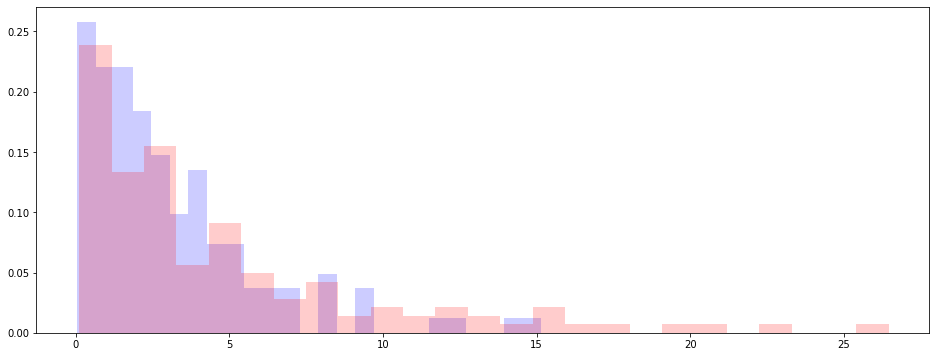

In [19]:
fig, axs = plt.subplots(1, figsize=(16, 6), sharex=True, sharey=True)

axs.hist(np.abs(estimated_group_means - actual_group_means), bins=25, alpha=0.2, density=True, color='blue')
axs.hist(np.abs(emperical_group_means - actual_group_means), bins=25, alpha=0.2, density=True, color='red')